### MULTIPLE LINEAR REGRESSION

### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [202]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400

In [203]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [204]:
features_response = df.columns.tolist()
print("Features_Toyota:",features_response)

Features_Toyota: ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


In [205]:
item_to_remove = ['Cylinders','Doors']

In [206]:
example_list = [item for item in range(5)]
example_list

[0, 1, 2, 3, 4]

In [207]:

numerical_features = df[features_response].select_dtypes(include=['number']).columns

corr = df[numerical_features].corr()
corr.iloc[0:5, 0:5]

,Price,Age_08_04,KM,HP,Automatic
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000


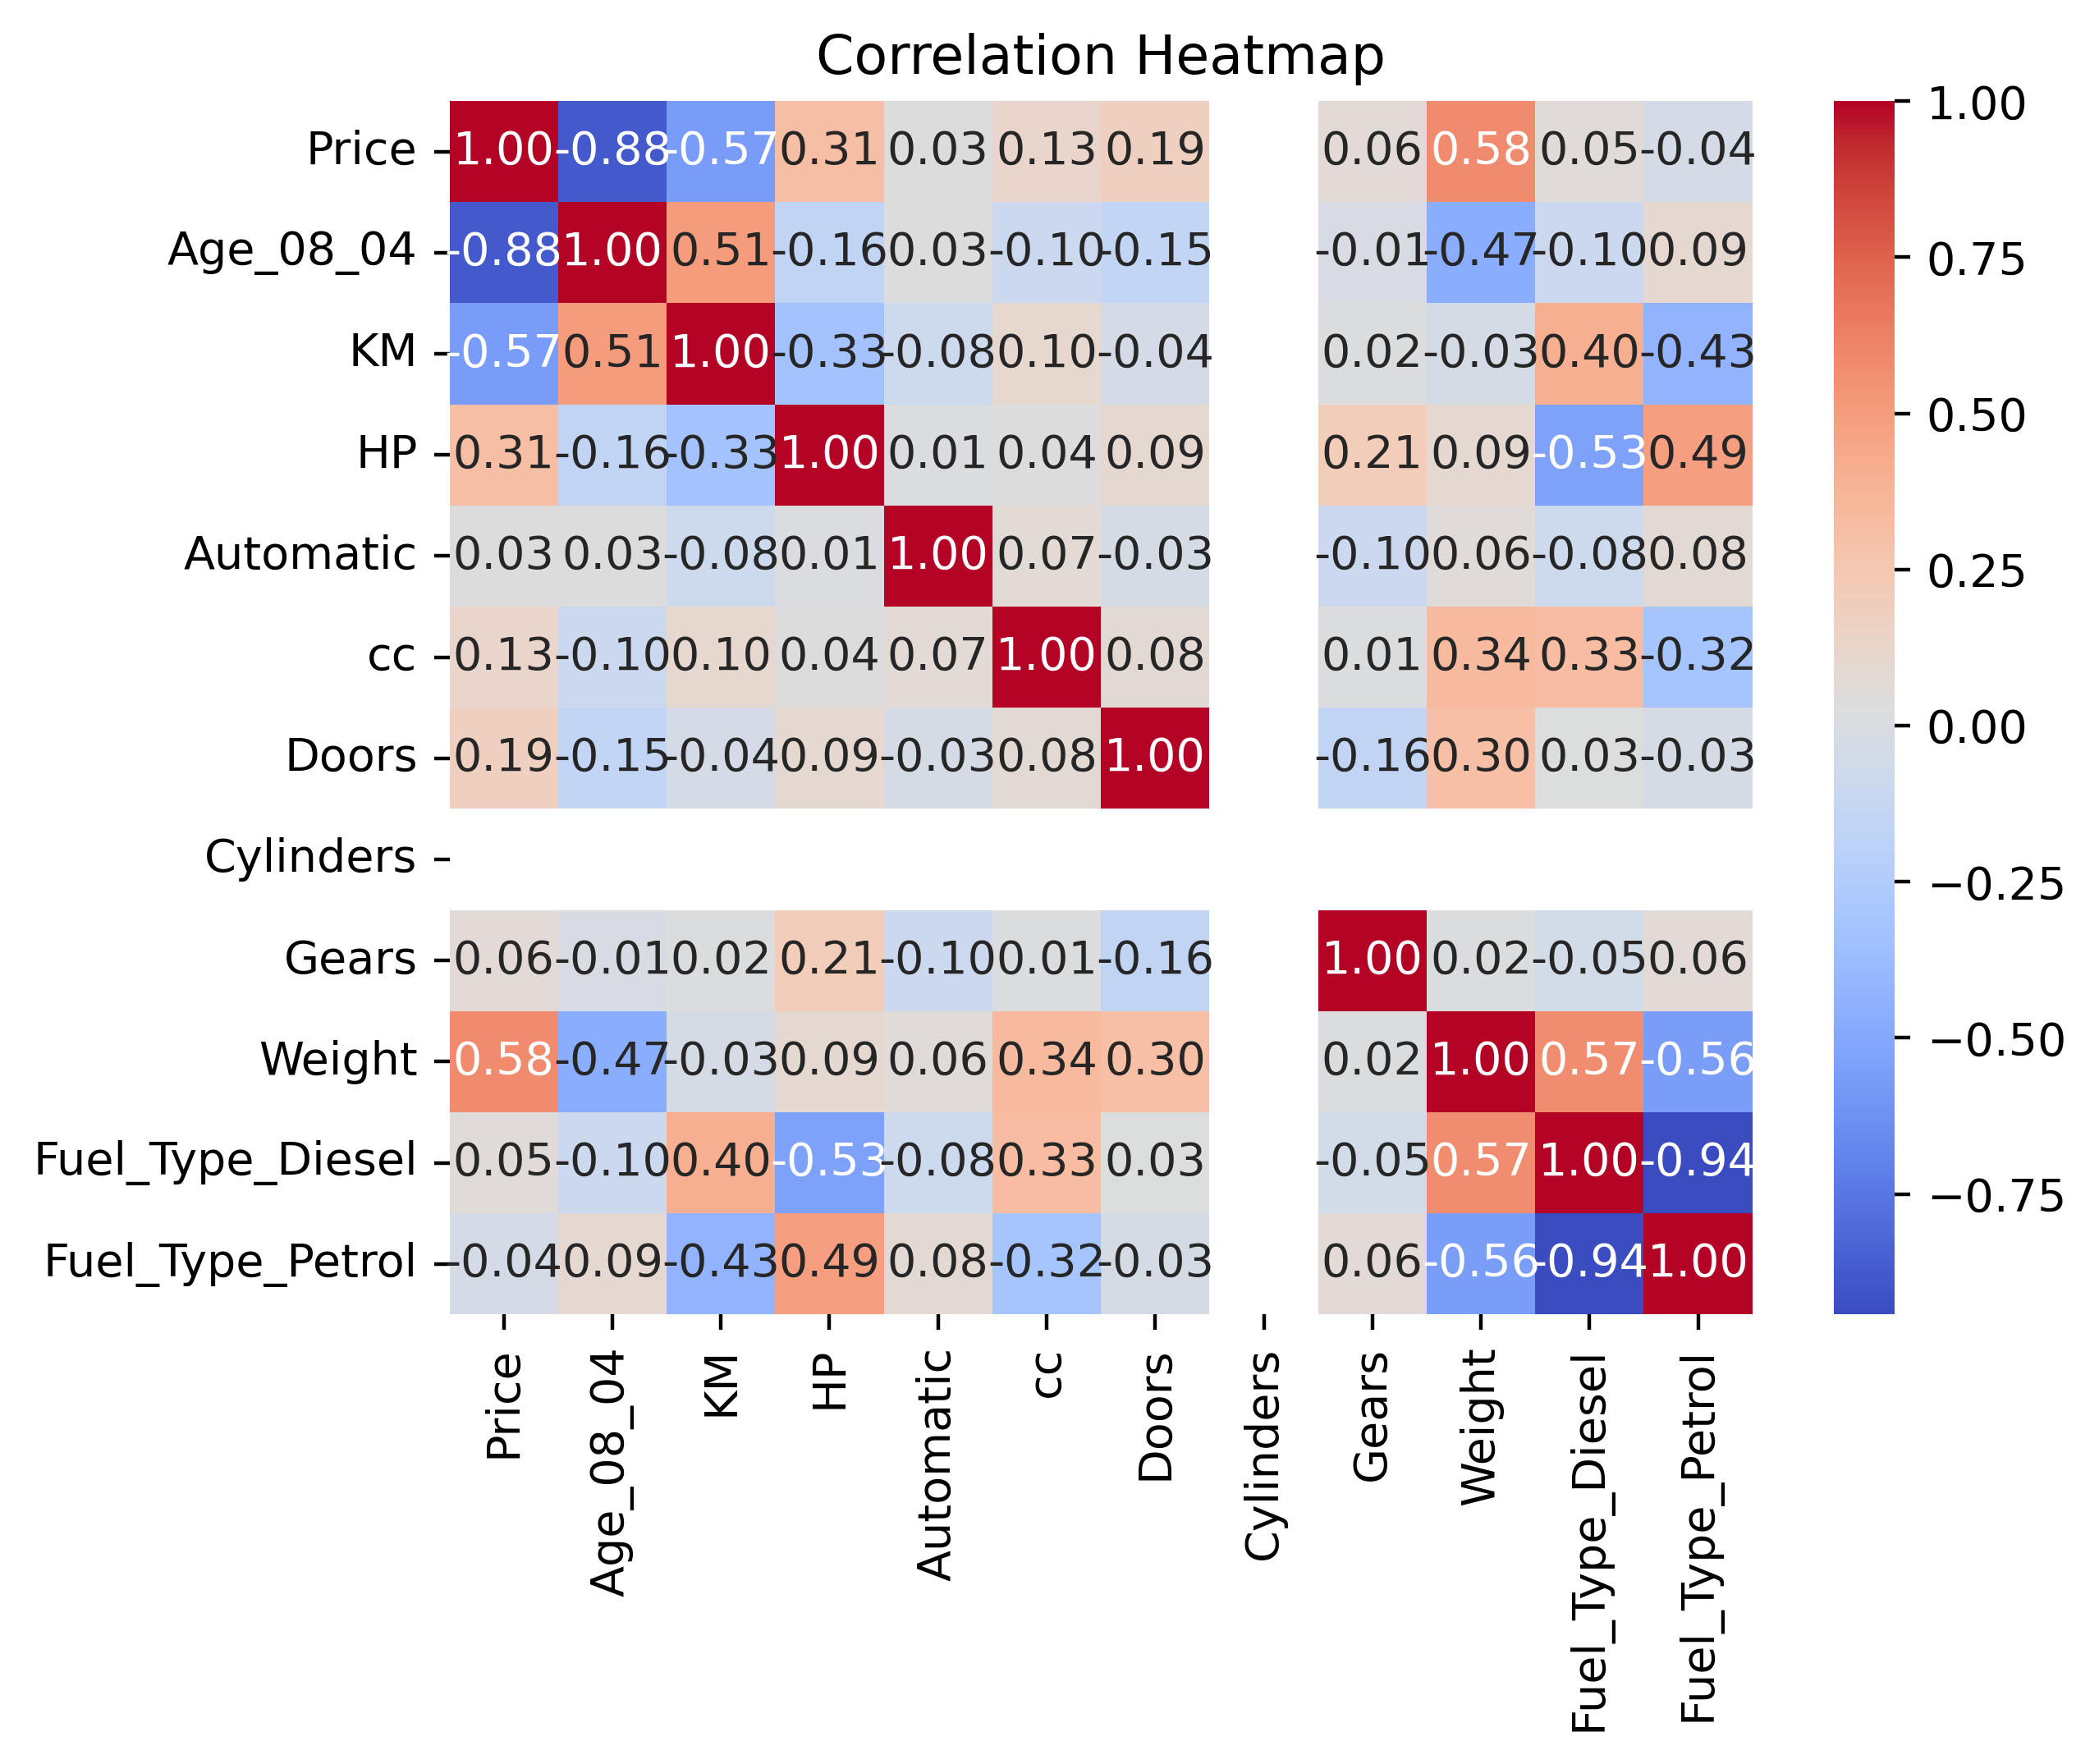

In [208]:
fuel_type_encoded = pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type', drop_first=True)

df = pd.concat([df, fuel_type_encoded], axis=1)

df.drop('Fuel_Type', axis=1, inplace=True)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [209]:
df.drop(columns = 'KM',inplace = True)

In [210]:
df['Automatic']=df['Automatic'].fillna(df['Automatic'].mean())
df['Gears']=df['Gears'].fillna(df['Gears'].mode()[0])

In [211]:
df.isnull().sum()

Price               0
Age_08_04           0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   HP                1436 non-null   int64
 3   Automatic         1436 non-null   int64
 4   cc                1436 non-null   int64
 5   Doors             1436 non-null   int64
 6   Cylinders         1436 non-null   int64
 7   Gears             1436 non-null   int64
 8   Weight            1436 non-null   int64
 9   Fuel_Type_Diesel  1436 non-null   bool 
 10  Fuel_Type_Petrol  1436 non-null   bool 
dtypes: bool(2), int64(9)
memory usage: 103.9 KB


In [213]:
df.drop(columns = 'Weight',inplace = True)

In [214]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 43)

In [216]:
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y_test.shape)

(1005, 9)
(431,)
(1005,)
(431,)


In [217]:
X = df.drop(columns=['Price'])
y = df['Price']

categorical_cols = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoded_data = encoder.fit_transform(X[categorical_cols])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X = X.drop(columns=categorical_cols)
X = pd.concat([X, encoded_df], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pred = model.predict(X_test)

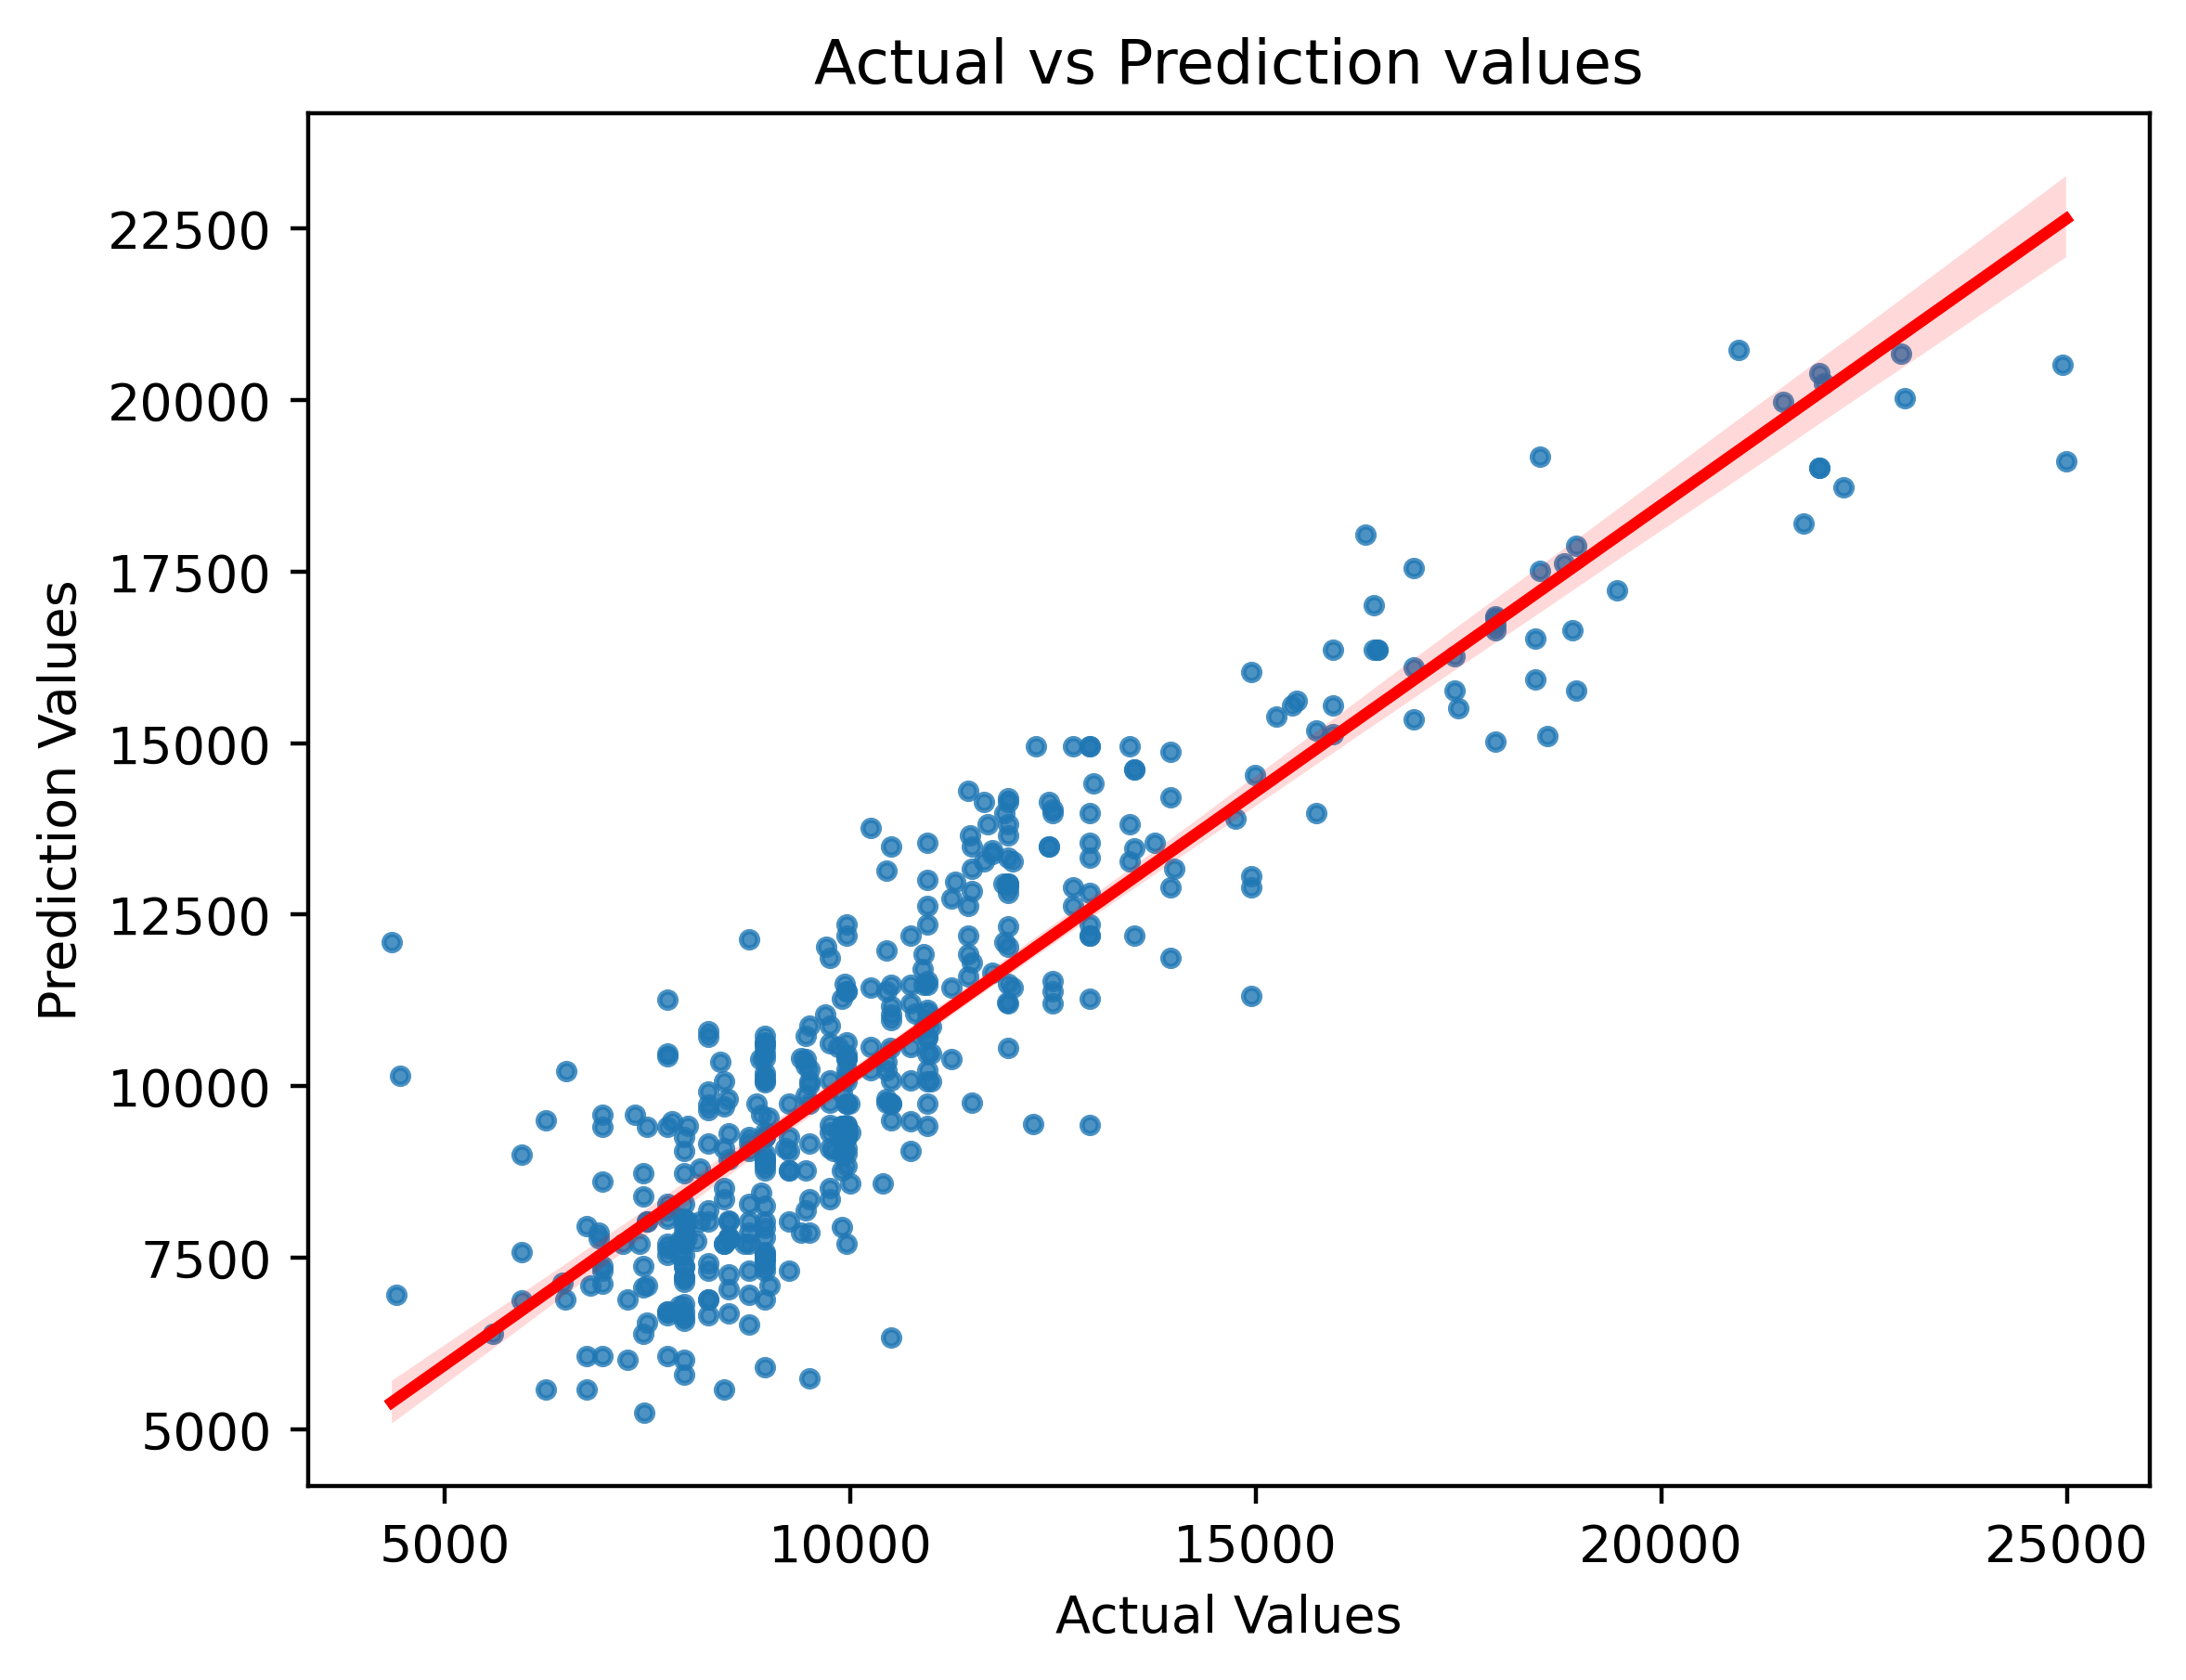

In [219]:
sns.regplot(x = y_test, y = y_pred,scatter_kws = {'s': 10},line_kws = {'color':'red'})
plt.xlabel('Actual Values')
plt.ylabel('Prediction Values')
plt.title('Actual vs Prediction values')
plt.show()

### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [220]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f'Model 1 - MSE: {mse1}, R^2: {r2_1}')

coeff_df = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Model 1 - MSE: 2227497.396236835, R^2: 0.8097783946792041
                  Coefficient
Age_08_04         -162.630426
HP                  54.485306
Automatic         1052.599752
cc                  -0.011445
Doors              212.126410
Cylinders            0.000000
Gears              436.239559
Fuel_Type_Diesel  2821.548839
Fuel_Type_Petrol  1643.820155


In [221]:
X_train_interaction = X_train.copy()
X_test_interaction = X_test.copy()

X_train_interaction['Fuel_Type'] = X_train['HP'] * X_train['Age_08_04']  
X_test_interaction['Fuel_Type'] = X_test['HP'] * X_test['Age_08_04']  

model2 = LinearRegression()
model2.fit(X_train_interaction, y_train)

y_pred2 = model2.predict(X_test_interaction)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f'Model 2 - MSE: {mse2}, R^2: {r2_2}')

Model 2 - MSE: 2147645.317685524, R^2: 0.8165975229959843


In [222]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

y_pred3 = model3.predict(X_test_poly)

# Evaluate the model
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print(f'Model 3 - MSE: {mse3}, R^2: {r2_3}')

Model 3 - MSE: 1793986.655975202, R^2: 0.8467989133454386


In [223]:
print(f'Model 1 - MSE: {mse1}, R^2: {r2_1}')
print(f'Model 2 - MSE: {mse2}, R^2: {r2_2}')
print(f'Model 3 - MSE: {mse3}, R^2: {r2_3}')

Model 1 - MSE: 2227497.396236835, R^2: 0.8097783946792041
Model 2 - MSE: 2147645.317685524, R^2: 0.8165975229959843
Model 3 - MSE: 1793986.655975202, R^2: 0.8467989133454386


### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [224]:
MSR = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :", MSR)
R2_score = r2_score(y_test,y_pred)
print("R2_Score :", R2_score)
RMSE = np.sqrt(MSR)
print("Root Mean Squared:",RMSE)


Mean Squared Error : 2227497.396236835
R2_Score : 0.8097783946792041
Root Mean Squared: 1492.480283366194


### 5.Apply Lasso and Ridge methods on the model.

In [225]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso - MSE: {mse_lasso}, R^2: {r2_lasso}')

Lasso - MSE: 2227482.1730770757, R^2: 0.8097796946914476


In [226]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge - MSE: {mse_ridge}, R^2: {r2_ridge}')

Ridge - MSE: 2227411.0603001523, R^2: 0.8097857675095833
